### Grid based-filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sclibrary.data_reader.network_reader import NetworkReader
from sclibrary.sc.simplicial_complex import SimplicialComplexNetwork
from sclibrary.plot import SCPlot

In [3]:
data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = NetworkReader.read_csv(filename=filename, delimeter=delimeter, 
                           src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)

simplices = G.simplicies(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# coordinates
filename = data_folder + '/coordinates.csv'
coordinates = NetworkReader.get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")


# create a simplicial complex network
sc = SimplicialComplexNetwork(simplices=simplices)
# create a plot
scplot = SCPlot(sc, coordinates)

In [4]:
f0 = np.array([
    2.25,
    0.13,
    1.72,
    -2.12,
    1.59,
    1.08,
    -0.30,
    -0.21,
    1.25,
    1.45,
])

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])

#### Subcomponent extraction

Error 0.7046866285156045


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


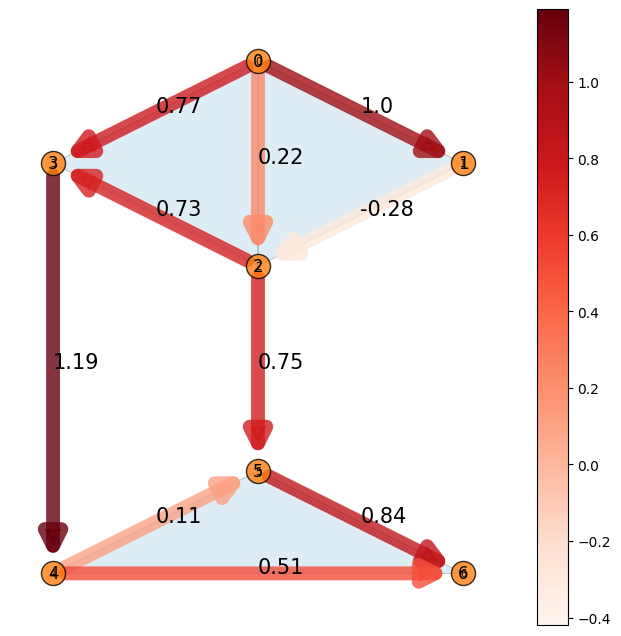

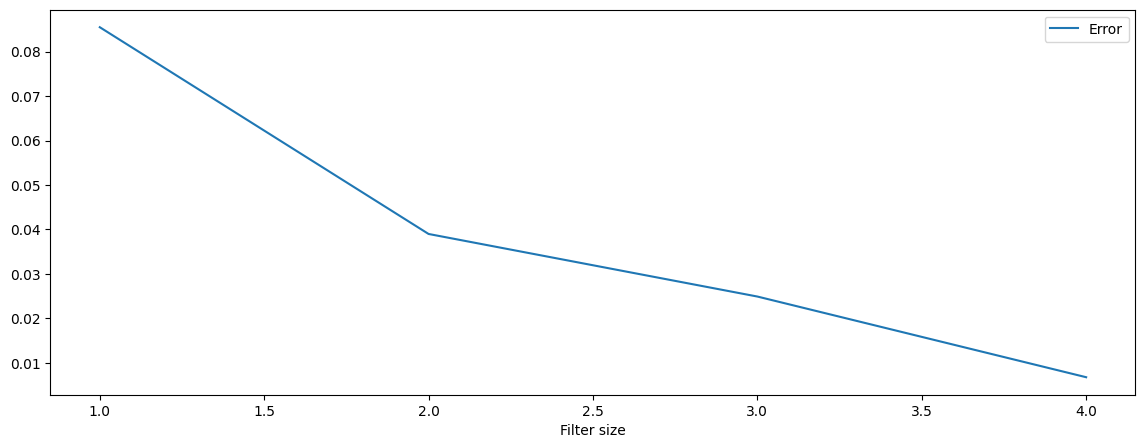

In [5]:
from sclibrary.filters.grid_based_filter_design import GridBasedFilterDesign

filter_size = 4

gbf = GridBasedFilterDesign(sc)
gbf.subcomponent_extraction(p_choice="L1", L=filter_size, component="gradient", f=f)

#print("Error:", gbf.history["error"])
f_est = gbf.history["f_estimated"]
print("Error", gbf.calculate_error(f_est, f0))

scplot.draw_flow(np.round(f_est, 2))

# plot the error
plt.figure(figsize=(14, 5))
plt.plot(range(1, filter_size + 1), gbf.history["error_per_filter_size"], label="Error")
plt.xlabel("Filter size")
plt.legend()

Error 0.7325779138357084
[0.47317673 0.26634913 0.08042646 0.01900903]


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


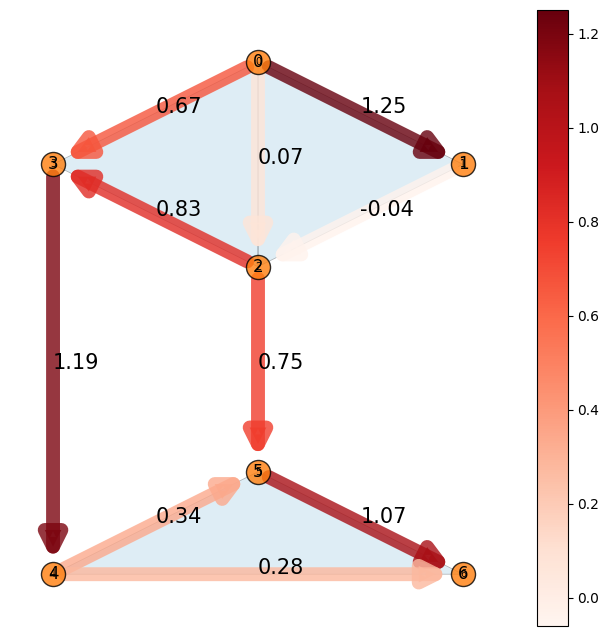

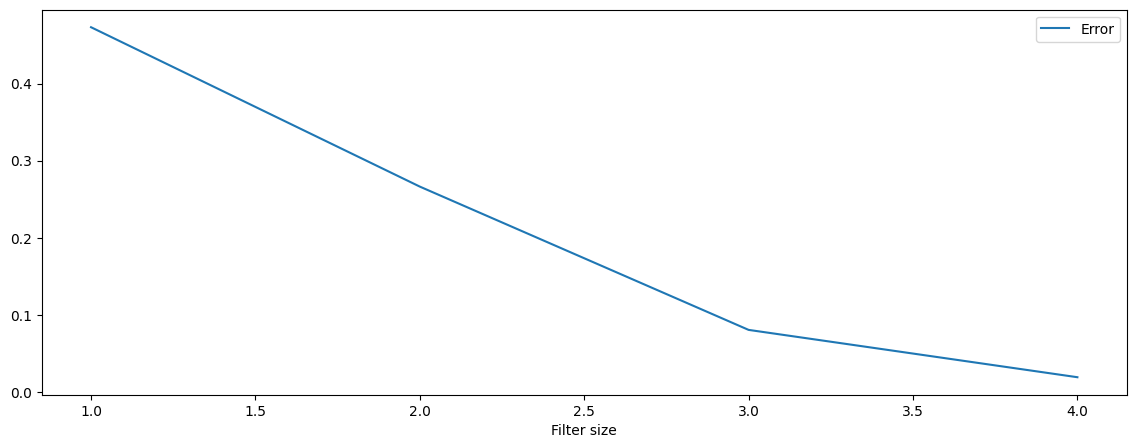

In [6]:
filter_size = 4

gbf = GridBasedFilterDesign(sc)
gbf.subcomponent_extraction(p_choice="L1L", L=filter_size, component="gradient", f=f)

f_est_L1L = gbf.history["f_estimated"]
print("Error", gbf.calculate_error(f_est_L1L, f0))
print(gbf.history["error_per_filter_size"])

scplot.draw_flow(np.round(f_est_L1L, 2))

# plot the error
plt.figure(figsize=(14, 5))
plt.plot(range(1, filter_size + 1), gbf.history["error_per_filter_size"], label="Error")
plt.xlabel("Filter size")
plt.legend()

#### General Filter

Error: 0.4568487311086471


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


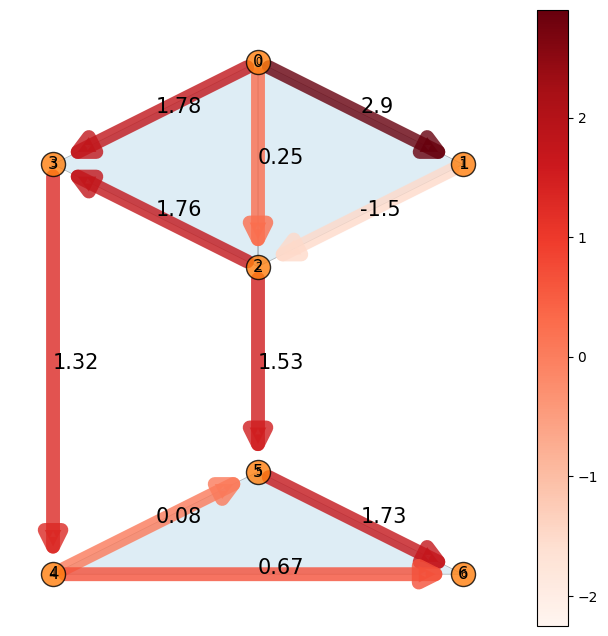

In [7]:
gbf = GridBasedFilterDesign(sc)

f_est_h, f_est_c, f_est_g = gbf.general_filter(
    L1 = 1, L2 = 1, f=f,
)

f_est = f_est_h + f_est_c + f_est_g
print("Error:", gbf.calculate_error(f_est, f0))

scplot.draw_flow(np.round(f_est, 2))

In [8]:
gbf.history

{'L1': {'filter': array([[0.7286171317100525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.7286171317100525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.7286171317100525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.7286171317100525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.7286171317100525, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.7286171317100525, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7286171317100525, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7286171317100525, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7286171317100525, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7286171317100525]],
        dtype=object),
  'f_estimated': array([ 2.11298968,  0.18215428,  1.29693849, -1.0929257 ,  1.28236615,
          1.11478421,  0.96177461,  0.05828937,  0.48817348,  1.26050764]),
  'frequency_responses': array([0.7